<center>

# Курс "Основы Python для анализа данных"

## Артамонов Игорь Михайлович
## Факультет "Прикладная математика" МАИ

### Практическое № 5.  Ввод и вывод. Работа с реляционными базами данных.

</center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие 5. Ввод и вывод. Реляционные базы данных.</b>
       * 

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

# Общее

* В Python присутсвует ввод-вывод, аналогичный другим императивным языкам программирования
* Однако, в подавляющем __большинстве случаев__, используются __специфические__ для конкретной области средства ввода-вывода
* При анализе задачи __ввода__, целесообразно ответить на следующие вопросы:
    - что нам надо ввести
    - где мы это будем использовать
    - в каком формате хранятся данные во входном файле
    - в какой формат они загружаются в программе
    - в каком формате нам их удобно будет использовать
* При анализе задачи __вывода__ вопросы похожи, но последовательность близка к обратной:
    - в каком формате мы имеем данные после обработки
    - какова цель сохранения
    - какие средства сохранения в нужный нам тип есть
    - из какого формата сохраняет данное средство ввода-вывода
* Работа с табличными данными - одна из сильных сторон Python, в том числе - благодаря вводу-выводу

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline

In [2]:
import os
import os.path

### Загрузка файлов из внешних источников

In [4]:
!wget -O kinglear.txt 'http://shakespeare.mit.edu/lear/full.html'

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


### Ввод из файлов

In [5]:
kinglear = 'kinglear.txt'
file1 = open(kinglear,"r")

In [6]:
!pwd

"pwd" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [7]:
%pwd

'E:\\Progs\\mai_labs\\m1sem\\py\\5L'

In [8]:
%ls -la

 ’®¬ ў гбва®©бвўҐ E Ё¬ҐҐв ¬ҐвЄг Ќ®ўл© в®¬
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : FA1E-6D05

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ E:\Progs\mai_labs\m1sem\py\5L



” ©« ­Ґ ­ ©¤Ґ­


In [9]:
path = ''
name = 'kinglear.txt'
finename = os.path.join(path, name)
file = open(finename,"r")

In [10]:
file.name

'kinglear.txt'

In [11]:
file.mode

'r'

In [12]:
content=file.read()
print(content)

ACT I
SCENE I. King Lear's palace.
Enter KENT, GLOUCESTER, and EDMUND
KENT
I thought the king had more affected the Duke of
Albany than Cornwall.
GLOUCESTER
It did always seem so to us: but now, in the
division of the kingdom, it appears not which of
the dukes he values most; for equalities are so
weighed, that curiosity in neither can make choice
of either's moiety.
KENT
Is not this your son, my lord?
GLOUCESTER
His breeding, sir, hath been at my charge: I have
so often blushed to acknowledge him, that now I am
brazed to it.
KENT
I cannot conceive you.
GLOUCESTER
Sir, this young fellow's mother could: whereupon
she grew round-wombed, and had, indeed, sir, a son
for her cradle ere she had a husband for her bed.
Do you smell a fault?
KENT
I cannot wish the fault undone, the issue of it
being so proper.
GLOUCESTER
But I have, sir, a son by order of law, some year
elder than this, who yet is no dearer in my account:
though this knave came something saucily into the
world before he was sen

In [13]:
len(content)

150929

In [14]:
content[:110]

"ACT I\nSCENE I. King Lear's palace.\nEnter KENT, GLOUCESTER, and EDMUND\nKENT\nI thought the king had more affecte"

In [15]:
file.close()

### Использование with

In [16]:
with open(finename,"r") as file:
    l=file.read(10)
    print('1:', l)
    l=file.read(20)
    print('2:', l)
    l=file.read(30)
    print('3:', l)


1: ACT I
SCEN
2: E I. King Lear's pal
3: ace.
Enter KENT, GLOUCESTER, a


## <font color=red>ЗАДАНИЕ</font>

Введите первые 5 строк файла, распечатайте и выведите в файл с именем 'myfile1.txt'

In [20]:
## Ваш код ниже

myfile = "myfile2.txt"
my_f = open(myfile, "w")

with open(finename,"r") as file:
    for _ in range(5):
        line = next(file)
        print(line)
        my_f.write(line)
        
        

ACT I

SCENE I. King Lear's palace.

Enter KENT, GLOUCESTER, and EDMUND

KENT

I thought the king had more affected the Duke of



### Сериализованный ввод/вывод. Pickle

* Протокол pickle зависит от Python
* нет гарантий совместимости между разными версиями Python
* нет гарантий совместимости с другими языками программирования
* не все структуры данных Python можгут быть сериализованы pickle

In [21]:
import pickle

In [22]:
pickle_name = 'city.pickle'

In [23]:
data = {}
data['Москва'] = [16, 27, 15, 22],
data['Санкт-Петербург'] = [11, 19, 29, 5],
data['Нососибирск'] = [2, 23, 3, 15],
data['Томск'] = [8, 9, 10, 7],
data['Верхний Волочок'] = [96, 5, 6, 74]
data

{'Москва': ([16, 27, 15, 22],),
 'Санкт-Петербург': ([11, 19, 29, 5],),
 'Нососибирск': ([2, 23, 3, 15],),
 'Томск': ([8, 9, 10, 7],),
 'Верхний Волочок': [96, 5, 6, 74]}

In [24]:
with open(pickle_name, 'wb') as f:
     pickle.dump(data, f)

In [25]:
with open(pickle_name, 'rb') as f:
     new_data = pickle.load(f)

In [26]:
print(new_data)

{'Москва': ([16, 27, 15, 22],), 'Санкт-Петербург': ([11, 19, 29, 5],), 'Нососибирск': ([2, 23, 3, 15],), 'Томск': ([8, 9, 10, 7],), 'Верхний Волочок': [96, 5, 6, 74]}


In [27]:
# Посмотрим внутрь файла
file = open(pickle_name,"r") - #r - text file, rb - read  binary
content=file.read()
print(content)

Ђ}q (X   РњРѕСЃРєРІР°q]q(KKKKe…qX   РЎР°РЅРєС‚-РџРµС‚РµСЂР±СѓСЂРіq]q(KKKKe…qX   РќРѕСЃРѕСЃРёР±РёСЂСЃРєq]q(KKKKe…q	X
   РўРѕРјСЃРєq
]q(KK	K
Ke…qX   Р’РµСЂС…РЅРёР№ Р’РѕР»РѕС‡РѕРєq
]q(K`KKKJeu.


### В чём проблема?

In [28]:
bytes_read = open(pickle_name, "rb").read()
print(bytes_read )

b'\x80\x03}q\x00(X\x0c\x00\x00\x00\xd0\x9c\xd0\xbe\xd1\x81\xd0\xba\xd0\xb2\xd0\xb0q\x01]q\x02(K\x10K\x1bK\x0fK\x16e\x85q\x03X\x1d\x00\x00\x00\xd0\xa1\xd0\xb0\xd0\xbd\xd0\xba\xd1\x82-\xd0\x9f\xd0\xb5\xd1\x82\xd0\xb5\xd1\x80\xd0\xb1\xd1\x83\xd1\x80\xd0\xb3q\x04]q\x05(K\x0bK\x13K\x1dK\x05e\x85q\x06X\x16\x00\x00\x00\xd0\x9d\xd0\xbe\xd1\x81\xd0\xbe\xd1\x81\xd0\xb8\xd0\xb1\xd0\xb8\xd1\x80\xd1\x81\xd0\xbaq\x07]q\x08(K\x02K\x17K\x03K\x0fe\x85q\tX\n\x00\x00\x00\xd0\xa2\xd0\xbe\xd0\xbc\xd1\x81\xd0\xbaq\n]q\x0b(K\x08K\tK\nK\x07e\x85q\x0cX\x1d\x00\x00\x00\xd0\x92\xd0\xb5\xd1\x80\xd1\x85\xd0\xbd\xd0\xb8\xd0\xb9 \xd0\x92\xd0\xbe\xd0\xbb\xd0\xbe\xd1\x87\xd0\xbe\xd0\xbaq\r]q\x0e(K`K\x05K\x06KJeu.'


In [29]:
# Заодно создадим свой генератор
def bytes_from_file(filename, chunksize=8192):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                for b in chunk:
                    yield b
            else:
                break

byte_no = 0
num_of_bytes = 16
for b in bytes_from_file(pickle_name, chunksize=32):
    print(f"#{byte_no:03d} - {b:02x}")
    byte_no += 1
    if byte_no > num_of_bytes:
        break

#000 - 80
#001 - 03
#002 - 7d
#003 - 71
#004 - 00
#005 - 28
#006 - 58
#007 - 0c
#008 - 00
#009 - 00
#010 - 00
#011 - d0
#012 - 9c
#013 - d0
#014 - be
#015 - d1
#016 - 81


## <font color=red>ЗАДАНИЕ</font>

Создайте случайный массив numpy размером $10 x 10$, запишите его в виде pickle и заново считайте в другую переменную. Выведите среднее суммы квадратов разницы между массивом и им же, но транспонированным.

In [ ]:
# Ваш код



### Загрузка и открытие файлов из Интернет (URL)

In [30]:
import urllib
import urllib.request

In [31]:
with urllib.request.urlopen('http://lib.ru/LITRA/PUSHKIN/p4.txt') as url:
    i = 0
    if i < 4:
        print(url.readline())

b'<html><head><title>\xe1\xcc\xc5\xcb\xd3\xc1\xce\xc4\xd2 \xf3\xc5\xd2\xc7\xc5\xc5\xd7\xc9\xde \xf0\xd5\xdb\xcb\xc9\xce. \xe4\xd2\xc1\xcd\xc1\xd4\xc9\xde\xc5\xd3\xcb\xc9\xc5 \xd0\xd2\xcf\xc9\xda\xd7\xc5\xc4\xc5\xce\xc9\xd1</title></head><body><pre><div align=right><form action=/LITRA/PUSHKIN/p4.txt><select name=format><OPTION VALUE="_Contents">\xf3\xcf\xc4\xc5\xd2\xd6\xc1\xce\xc9\xc5<OPTION VALUE="_with-big-pictures.html">Fine HTML<OPTION VALUE="_with-big-pictures.html">Printed version<OPTION VALUE="_Ascii.txt">txt(Word,\xeb\xf0\xeb)<OPTION VALUE="">Lib.ru html</select><input type=submit value=go></form></div><pre>\n'


In [32]:
from html.parser import HTMLParser

In [35]:
with urllib.request.urlopen('http://www.gutenberg.org/files/1532/1532-0.txt') as url:
    i = 0
    for line in url:
#         print(line)
        print(line.decode())

        if i > 4:
            break
        else:
            i +=1
        
      
    



Project Gutenberg’s King Lear, by William Shakespeare



This eBook is for the use of anyone anywhere in the United States and

most other parts of the world at no cost and with almost no restrictions

whatsoever.  You may copy it, give it away or re-use it under the terms



## <font color=red>ЗАДАНИЕ</font>

Преобразуйте файл в список строк с удалением форматирования так, что в каждом элементе 
списка - только строка. Если строка пустая, то она должна сохраняться пустой строкой.

In [ ]:
# Ваш код


## Использование даты и времени

* date — работа только с датой
* time — работа со временем (независимо от дня) (Hour, minute, second, microsecond)
* DateTime — Комбинация даты и времени (Month, day, year, hour, second, microsecond)
* time delta — работа с временными разницами
* tzinfo — работа с временными зонами

In [39]:
from datetime import date
from datetime import time
# !!
from datetime import datetime
from datetime import timedelta
from datetime import tzinfo

In [40]:
d = date.today()
d

datetime.date(2019, 10, 4)

In [41]:
d.day, d.month, d.year

(4, 10, 2019)

In [45]:
dt = datetime.today()
dt

datetime.datetime(2019, 10, 4, 19, 2, 34, 491703)

In [46]:
dt.day, dt.month, dt.year

(4, 10, 2019)

In [47]:
dt.hour, dt.minute, dt.second, dt.microsecond

(19, 2, 34, 491703)

In [48]:
tt = dt.timetuple()
for it in tt:
    print(it)

2019
10
4
19
2
34
4
277
-1


In [49]:
td = timedelta(days=700, hours=14, minutes=24)
td

datetime.timedelta(days=700, seconds=51840)

In [50]:
year = timedelta(days=365)
another_year = timedelta(weeks=40, days=84, hours=23, minutes=50, seconds=600)

In [51]:
year.total_seconds()

31536000.0

In [52]:
year == another_year

True

In [57]:
dt - year

datetime.datetime(2018, 10, 4, 19, 2, 34, 491703)

#### Вывод даты и времени

In [58]:
dt.strftime("%A, %d. %B %Y %I:%M%p")

'Friday, 04. October 2019 07:02PM'

### Выведите количество (1) дней, (2) месяцев прошедшее с запуска первого искусственного спутника земли <br>(4 октября 1957)

In [ ]:
## Ваш код
first_sat = 
since = dt 

### JSON

* Популярный формат, пришедший из JavaScript
* Поддерживает меньше форматов, чем pickle
* Обеспечивает совместимость между языками программирования

In [59]:
import json

#### Соответствие типов данных в JSON и Python 3
| JSON | PYTHON 3  |
|--- |--- |
| object | dict |
| array | list |
| string | string |
| integer | integer |
| real number | float |
| true | True |
| false | False |
| null | None|

In [60]:
json.dumps(data)

'{"\\u041c\\u043e\\u0441\\u043a\\u0432\\u0430": [[16, 27, 15, 22]], "\\u0421\\u0430\\u043d\\u043a\\u0442-\\u041f\\u0435\\u0442\\u0435\\u0440\\u0431\\u0443\\u0440\\u0433": [[11, 19, 29, 5]], "\\u041d\\u043e\\u0441\\u043e\\u0441\\u0438\\u0431\\u0438\\u0440\\u0441\\u043a": [[2, 23, 3, 15]], "\\u0422\\u043e\\u043c\\u0441\\u043a": [[8, 9, 10, 7]], "\\u0412\\u0435\\u0440\\u0445\\u043d\\u0438\\u0439 \\u0412\\u043e\\u043b\\u043e\\u0447\\u043e\\u043a": [96, 5, 6, 74]}'

In [61]:
data

{'Москва': ([16, 27, 15, 22],),
 'Санкт-Петербург': ([11, 19, 29, 5],),
 'Нососибирск': ([2, 23, 3, 15],),
 'Томск': ([8, 9, 10, 7],),
 'Верхний Волочок': [96, 5, 6, 74]}

```python
{
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "sky diving", "singing"],
    "age": 35,
    "children": [
        {
            "firstName": "Alice",
            "age": 6
        },
        {
            "firstName": "Bob",
            "age": 8
        }
    ]
}
```

In [65]:
with open("data.json", "w") as write_file:
    json.dump(data, write_file)

In [66]:
!ls data.*

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [67]:
%ls data.*

 ’®¬ ў гбва®©бвўҐ E Ё¬ҐҐв ¬ҐвЄг Ќ®ўл© в®¬
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : FA1E-6D05

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ E:\Progs\mai_labs\m1sem\py\5L

04.10.2019  19:20               412 data.json
               1 д ©«®ў            412 Ў ©в
               0 Ї Ї®Є  242я653я921я280 Ў ©в бў®Ў®¤­®


In [ ]:
with open("data.json", "r") as read_file:
    decoded = json.load(read_file)
    
decoded

### Модуль io

* работа с потоковым вводом-выводом
* типы потоков вводв/вывода:
    - текстовый
    - двоичный
    - небуфферизованый (raw)

In [68]:
import io

In [70]:
f = open("myfile1.txt", "r", encoding="utf-8")

In [71]:
f = io.StringIO("some initial text data\nsome other data")

In [72]:
for c in f:
    print(c)

some initial text data

some other data


In [73]:
f = io.BytesIO(b"some initial binary data: \x00\x01")
view = f.getbuffer()
view[2:4]

In [74]:
b = io.BytesIO(b"abcdef")
view = b.getbuffer()
view[2:4] = b"56"
b.getvalue()


b'ab56ef'

In [75]:
f = open(os.path.join('pics/', 'rembrandt.jpg'), "rb", buffering=0)

In [76]:
for i in range(10):
    print(f.read())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x02\x00\x1c\x00\x1c\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x04\xa6\x03\xf0\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x02\x03\x06\x01\x07\x00\x08\t\xff\xc4\x00J\x10\x00\x01\x03\x03\x02\x04\x04\x04\x04\x04\x06\x01\x04\x00\x00\x0f\x01\x02\x03\x04\x00\x05\x11\x12!\x06\x131A\x14"Qa\x072q\x81\x15#B\x913R\xa1\xb1\x08\x16$b\xc1\xd1\xe1Cr\xf0\xf1%\x174S\x82\x92\tD\x1

### Почему такой выводом?

### Ввод / вывод изображений

In [95]:
image_path = os.path.join('pics/', 'rembrandt.jpg')
image = plt.imread(image_path, format=None)

In [96]:
type(image), image.shape

(numpy.ndarray, (1190, 1008, 3))

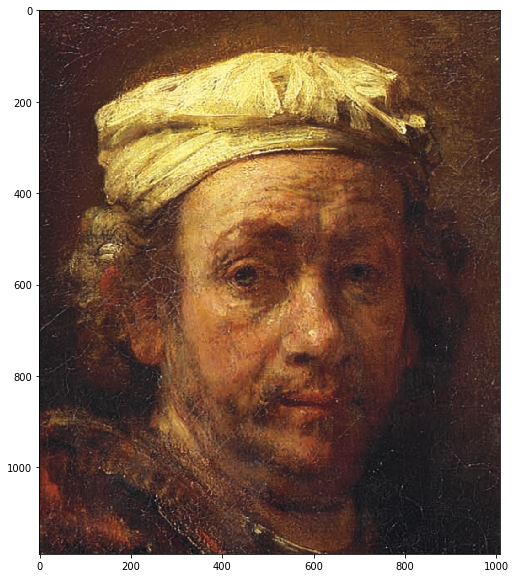

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(image);

## <font color=red>ЗАДАНИЕ</font>

Нарисуйте квадрат черного цвета с толщиной линии $5$ и размерами $100 x 100$ по внешним границам с центром в геометрическом центре картины. Выведите получившееся изображение на экран. Код черного цвета - $0$

In [99]:
### Ваш код

image[:, :, 0] = 0
image[:, :, 1] = 0
image[:, :, 2] = 0



ValueError: assignment destination is read-only

### Работа с SQL-базой данных

In [83]:
import sqlite3
from sqlite3 import Error

In [84]:
conn = sqlite3.connect("my.db")

In [85]:
create_table_req = """CREATE TABLE person 
    (firstname varchar(15), 
     lastname varchar(20), 
     age number(3), 
     address varchar(30), 
     city varchar(20));"""

In [86]:
cursor = conn.cursor()

In [87]:
conn.execute(create_table_req)

In [88]:
insert_table_req = """INSERT INTO person
    (firstname,  lastname, age, address, city)
    VALUES ("{}", "{}", {}, "{}", "{}")
""" 
conn.execute(insert_table_req.format('Диего', 'Мендес', 25, 'Москва, Братиславская ул., 26, 178', 'Москва'))

In [89]:
insert_table_req.format('Диего', 'Мендес', 25, 173655, 'Москва, Братиславская ул., 26, 178', 'Москва')

'INSERT INTO person\n    (firstname,  lastname, age, address, city)\n    VALUES ("Диего", "Мендес", 25, "173655", "Москва, Братиславская ул., 26, 178")\n'

In [90]:
cursor.execute("SELECT * FROM person")
rows = cursor.fetchall()
 
for row in rows:
    print(row)

('Диего', 'Мендес', 25, 'Москва, Братиславская ул., 26, 178', 'Москва')


In [91]:
conn = sqlite3.connect(':memory:')

In [92]:
conn.execute('DROP TABLE person')

OperationalError: no such table: person

## <font color=red>ЗАДАНИЕ</font>

Введите данные из файла по продажам авокадо в массив numpy . После этого вычислите средние значения всех столбцов средствами numpy и средствами SQL

Путь к файлу <i>datasets/Avocado Prices/avocado.csv</i><br><br>

Либо его можно скачать по ссылке на kaggle.com:<br>
https://www.kaggle.com/neuromusic/avocado-prices/

In [ ]:
# Ваш код



## Экзаменационные вопросы:

* Ввод и вывод из файла
* Сериализованный ввод и вывод
* JSON
* Работа с SQL из Python